# 🌳 Decision Trees & Random Forests — Internship Task

This notebook demonstrates **Decision Tree and Random Forest models**  
using a classification dataset (Heart Disease / Breast Cancer).  

---


In [1]:
# 1) Import libraries & load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Using sklearn's Breast Cancer dataset as placeholder (since Heart Disease dataset is external)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
print("Dataset shape:", X.shape, y.shape)
X.head()


Dataset shape: (569, 30) (569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# 2) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
# 3) Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=None)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=data.target_names))


Decision Tree Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



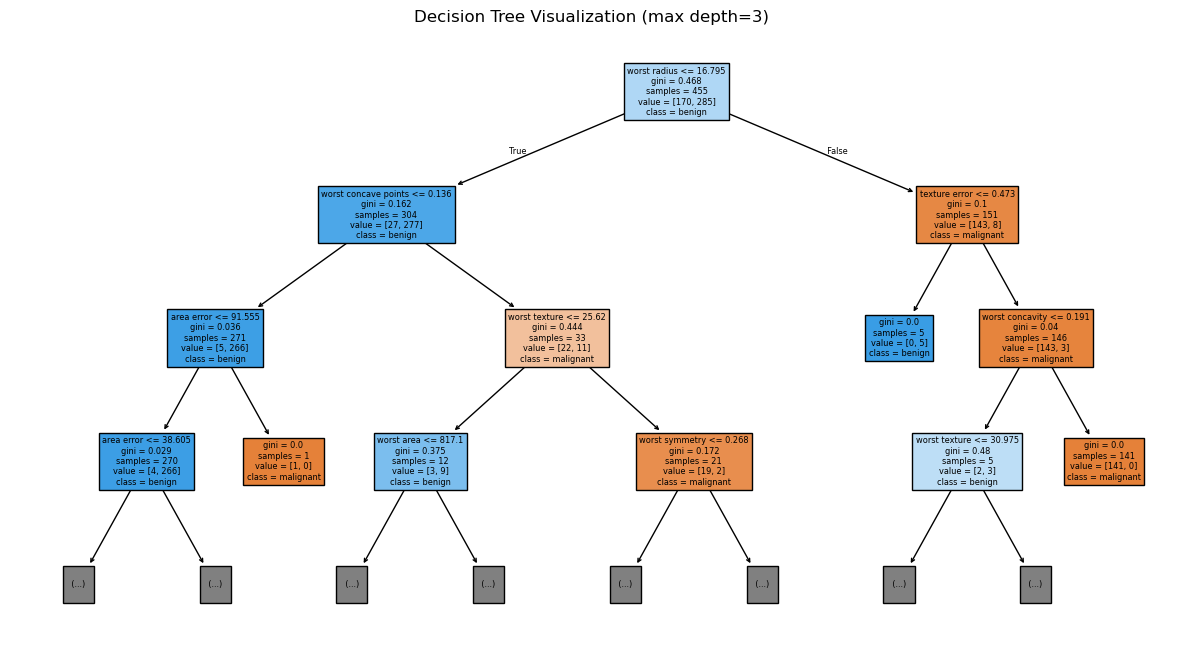

In [4]:
# 4) Visualize the Decision Tree (limited depth for readability)
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True, max_depth=3)
plt.title("Decision Tree Visualization (max depth=3)")
plt.show()


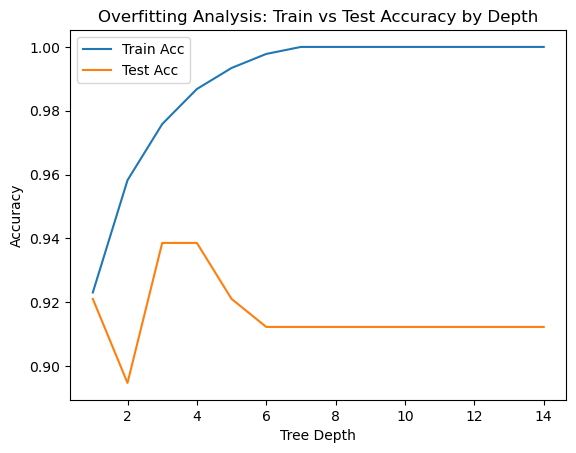

In [5]:
# 5) Overfitting analysis by varying tree depth
train_acc, test_acc = [], []
depths = range(1, 15)
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(depths, train_acc, label="Train Acc")
plt.plot(depths, test_acc, label="Test Acc")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting Analysis: Train vs Test Accuracy by Depth")
plt.show()


In [6]:
# 6) Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=data.target_names))


Random Forest Accuracy: 0.956140350877193
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



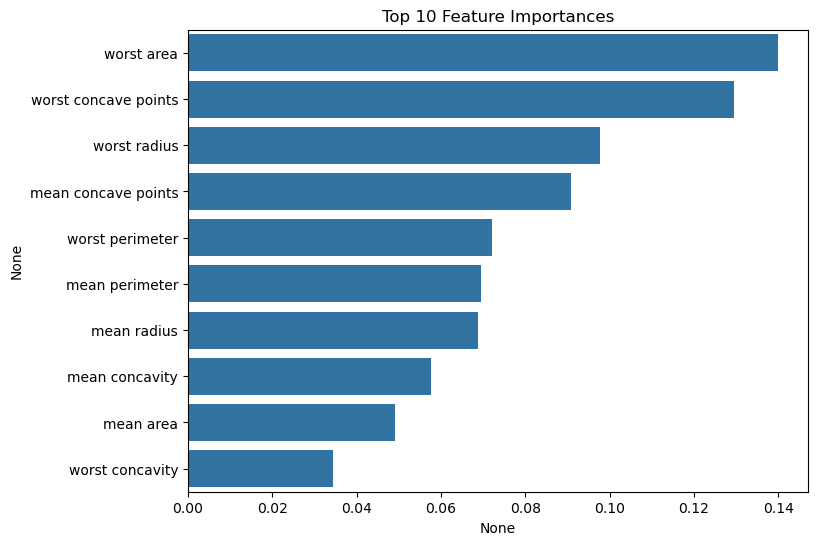

In [7]:
# 7) Feature Importances (from Random Forest)
importances = pd.Series(rf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Feature Importances")
plt.show()


In [8]:
# 8) Cross-validation for Random Forest
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean CV accuracy: 0.9560937742586555
